# Case Study on Probability for Data Science

**Problem Statement:**
    
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given 
dataset.(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

## Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## About mashroom dataset

The dataset used in this project contains 8124 instances of mushrooms with 23 features like cap-shape, 
cap-surface, cap-color, bruises, odor, etc.

**Attribute Information:**

* cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
* cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
* cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
* bruises: bruises=t, no=f 
* odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
* gill-attachment: attached=a, descending=d, free=f, notched=n 
* gill-spacing: close=c, crowded=w, distant=d 
* gill-size: broad=b, narrow=n 
* gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o,  pink=p, purple=u, red=e, white=w, yellow=y 
* stalk-shape: enlarging=e, tapering=t 
* Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
* stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
* stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
* stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
* stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
* veil-type: partial=p, universal=u 
* veil-colour: brown=n, orange=o, white=w, yellow=y 
* ring-number: none=n, one=o, two=t 
* ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
* spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
* population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
* habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

## Read the dataset to the python environment.

In [2]:
data = pd.read_csv("mushrooms.csv")

In [3]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
data.describe(include="all").T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
# display number of samples on each class
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

## Manipulating Data

The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column 
to a number.

In [8]:
# Using LabelEncoder to convert catergory values to ordinal
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

data.head().T

,0,1,2,3,4
class,1,0,0,1,0
cap-shape,5,5,0,5,5
cap-surface,2,2,2,3,2
cap-color,4,9,8,8,3
bruises,1,1,1,1,0
odor,6,0,3,6,5
gill-attachment,1,1,1,1,1
gill-spacing,0,0,0,0,1
gill-size,1,0,0,1,0
gill-color,4,4,5,5,4


from the above figure we can see that veil-type has only one unique value and hence won't contribute anything to the data. 
So we can safely remove it.

In [9]:
data = data.drop(["veil-type"],axis=1)

## Visualizations

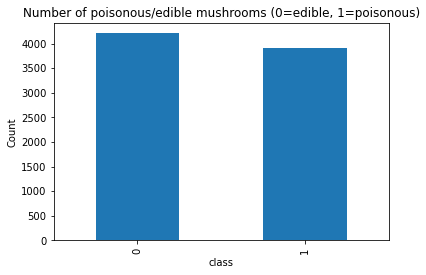

In [10]:
plt.figure()
pd.Series(data['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

**correlation between the variables**

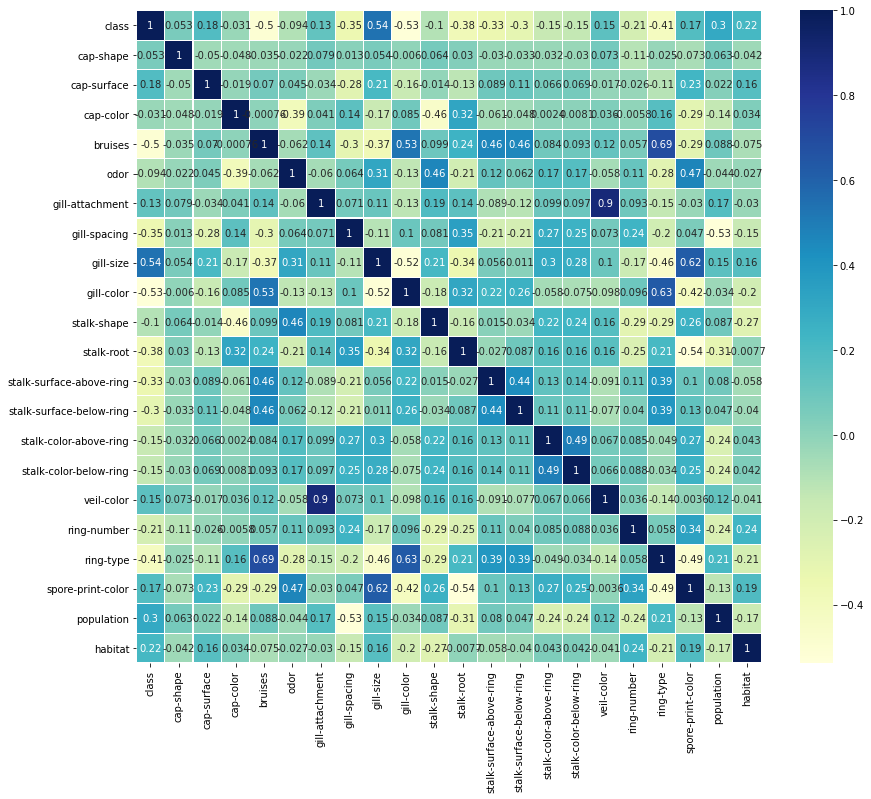

In [11]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [12]:
#Set Visualizations function and params
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

**Plot count value of columns function**

In [13]:
def plot_col(col, hue=None, color=['red', 'purple'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

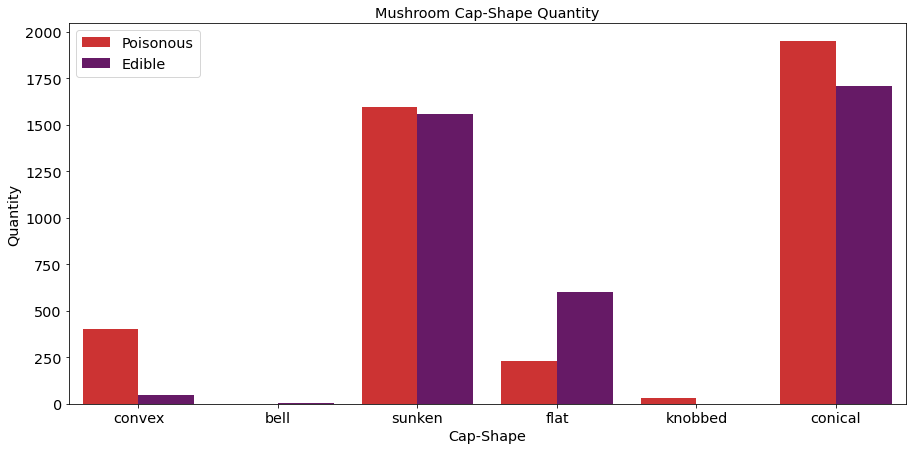

In [14]:
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

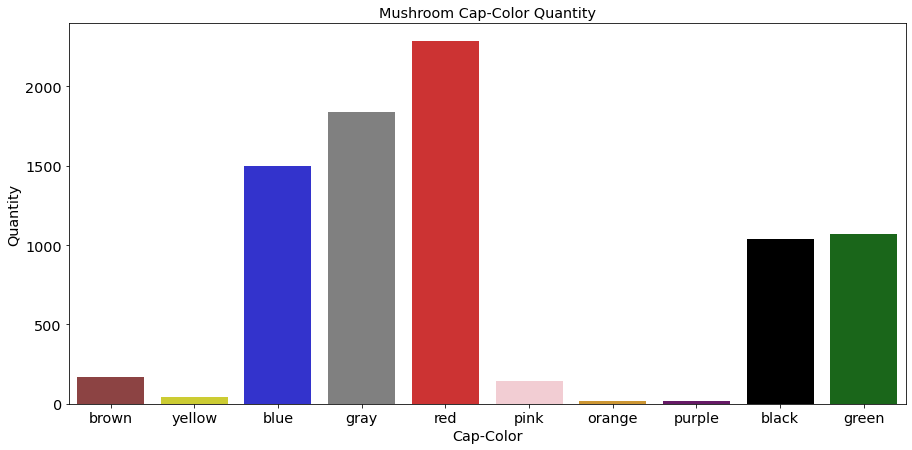

In [15]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

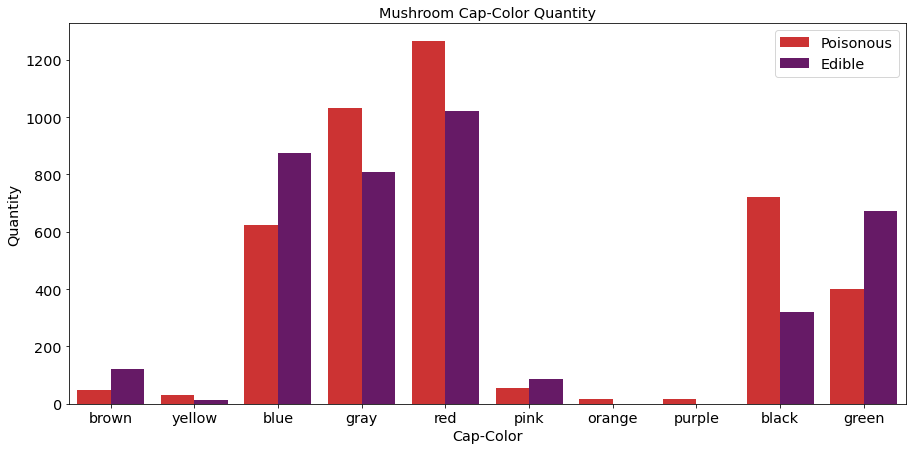

In [16]:
plot_col(col='cap-color', hue='class', labels=color_dict)

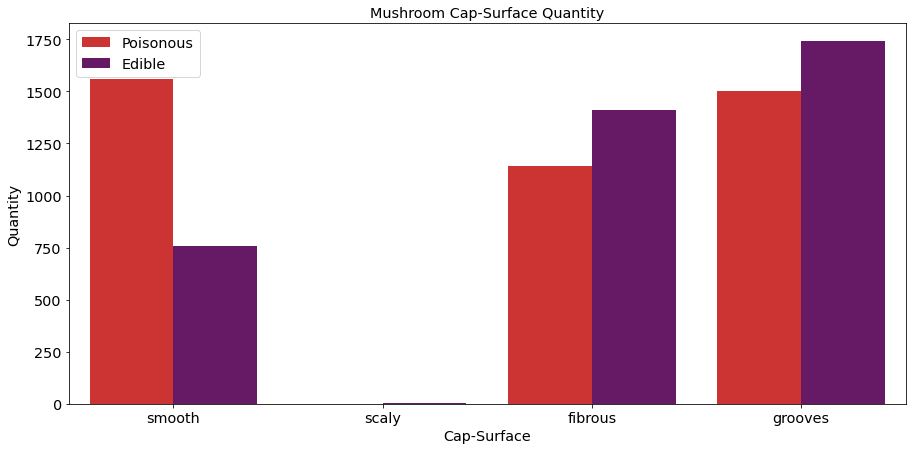

In [17]:
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
plot_col(col='cap-surface', hue='class', labels=surface_dict)

## Preparing data

We can make use of scikit-learn's train_test_split method for creating the training and testing data.

In [18]:
from sklearn.model_selection import train_test_split
# "class" column as numpy array.
y = data["class"].values
# All data except "class" column.
x = data.drop(["class"], axis=1).values
# Split data for train and test.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

## Classification model

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

## 1.Logistic Regression classification

In [20]:
from sklearn.linear_model import LogisticRegression

## lr = LogisticRegression(solver="lbfgs")
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))


Test Accuracy: 94.65%


In [21]:
y_pred = lr.predict(x_test)

## KNN Classification

In [22]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [23]:
y_pred = knn.predict(x_test)

In [24]:
print("KNeighbors Classifier report \n", classification_report(y_test, y_pred))

KNeighbors Classifier report 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      0.99       782

    accuracy                           1.00      1625
   macro avg       0.99      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## SVM Classification

In [25]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [26]:
y_pred = svm.predict(x_test)

In [27]:
print("SVM Classification report \n", classification_report(y_test, y_pred))

SVM Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Naive Bayes Classification

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 92.18%


In [29]:
y_pred = nb.predict(x_test)

In [30]:
print("Naive Bayes Classification report \n", classification_report(y_test, y_pred))

Naive Bayes Classification report 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



## Decision Tree Classification

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [32]:
y_pred = dt.predict(x_test)

In [33]:
print("Decision Tree Classifier report \n", classification_report(y_test, y_pred))

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Random Forest Classification

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


In [35]:
y_pred = rf.predict(x_test)

In [36]:
print(" RandomForest Classifier report \n",classification_report(y_test, y_pred))

 RandomForest Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [37]:
test = pd.DataFrame({'Predicted Data': y_pred, 'Test Data' : y_test})
test.sample(10)

,Predicted Data,Test Data
658,1,1
975,1,1
1299,1,1
1180,1,1
418,0,0
78,1,1
24,1,1
917,1,1
539,0,0
792,0,0


 ## Checking Classification Results with Confusion Matrix

In this section I will check the results with confusion matrix on Logistic Regression and KNN Classification.
Logistic Regression's accuracy was 94.65% and KNN's was 100%.

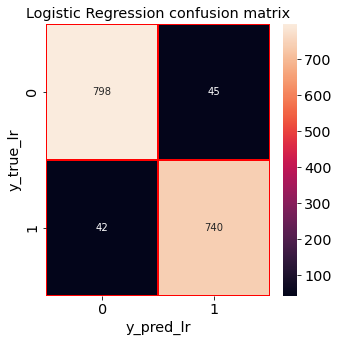

In [38]:
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Logistic Regression confusion matrix")
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

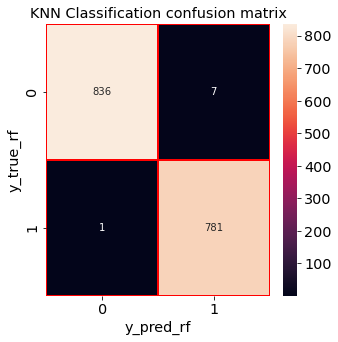

In [39]:
y_pred_knn = knn.predict(x_test)
y_true_knn = y_test
cm = confusion_matrix(y_true_knn, y_pred_knn)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("KNN Classification confusion matrix")
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

### Conclusion

* With confusion matrix we saw that our train and test datas balanced, so there is no problem in there.
* Most of classfication methods hit 100% accuracy with this dataset.

In [40]:
#end